In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/wholesome_customers_data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [10]:
print(df.describe())



          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

NameError: name 'expenditure_cols' is not defined

In [5]:
print("Unique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column:
Channel: 2
Region: 3
Fresh: 433
Milk: 421
Grocery: 430
Frozen: 426
Detergents_Paper: 417
Delicassen: 403


In [6]:
print("Average values for numerical columns:")
print(df.mean(numeric_only=True))


Average values for numerical columns:
Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64


In [8]:
spend_cols = ['Fresh', 'Milk', 'Grocery',
              'Frozen', 'Detergents_Paper', 'Delicassen']

# Compute correlations
correlation_matrix = df[spend_cols].corr()
print("Correlation matrix:")
print(correlation_matrix)







Correlation matrix:
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


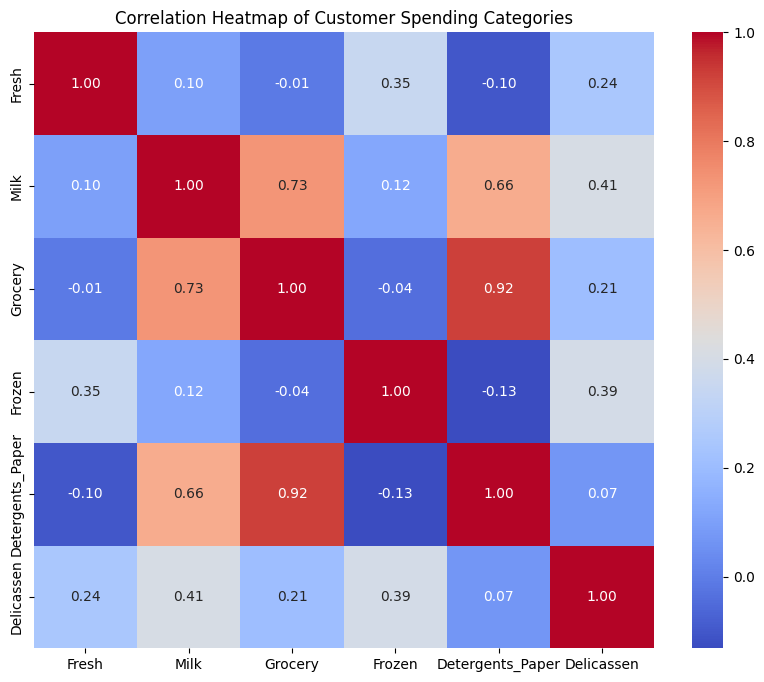

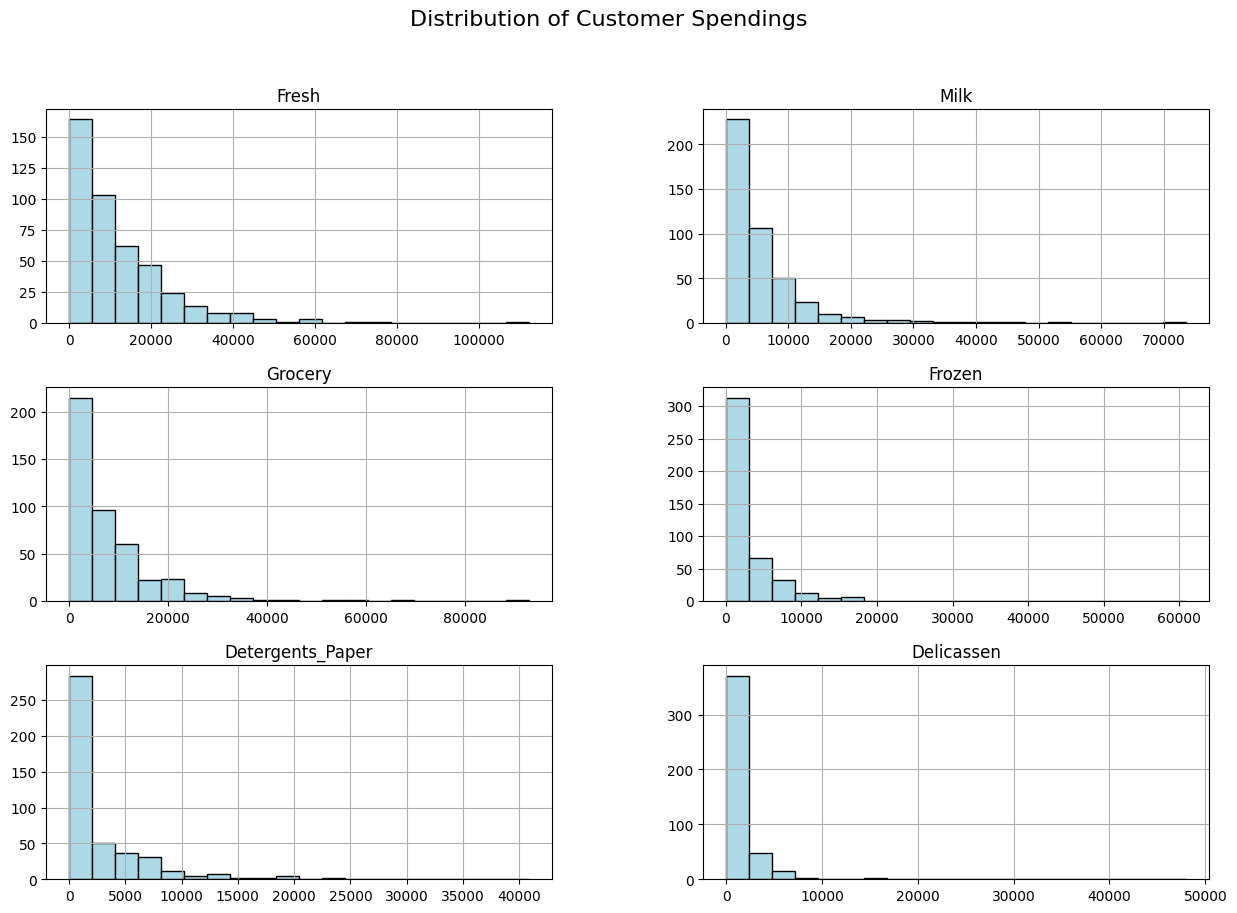

count       440.000000
mean      33226.136364
std       26356.301730
min         904.000000
25%       17448.750000
50%       27492.000000
75%       41307.500000
max      199891.000000
Name: Total_Spend, dtype: float64


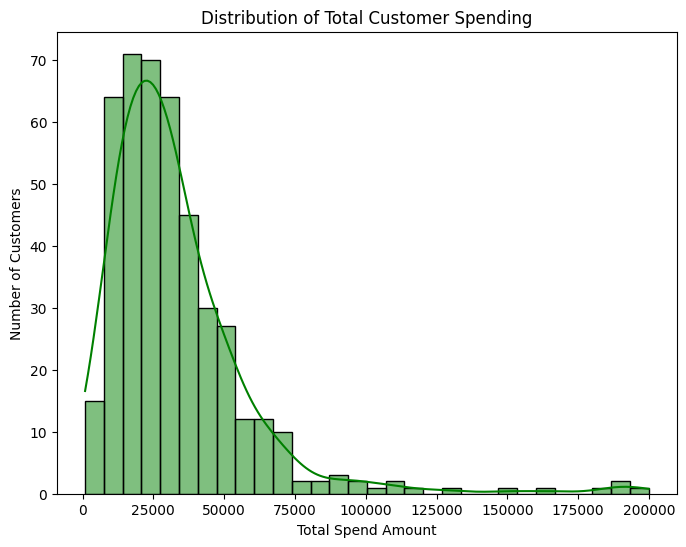

Spending_Segment
Mid Spender     216
High Spender    191
Low Spender      33
Name: count, dtype: int64


<ipython-input-9-381c58a80378>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spending_Segment', data=df, palette='Set2')


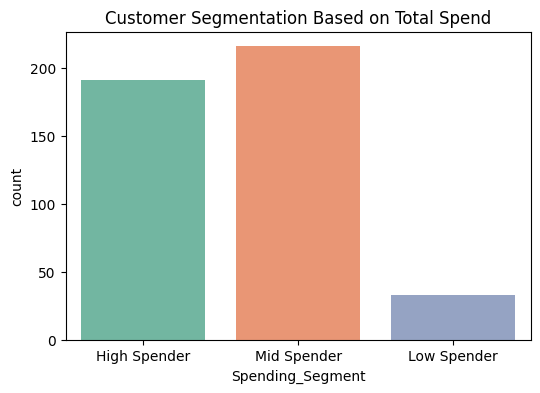

In [9]:
# Visualize the correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Customer Spending Categories")
plt.show()

# Plot histograms for spending columns
df[spend_cols].hist(figsize=(15,10), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Distribution of Customer Spendings", fontsize=16)
plt.show()

# Create a new Total Spend column
df['Total_Spend'] = df[spend_cols].sum(axis=1)

# Summary of total spend
print(df['Total_Spend'].describe())

# Plot distribution of total spend
plt.figure(figsize=(8,6))
sns.histplot(df['Total_Spend'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Customer Spending")
plt.xlabel("Total Spend Amount")
plt.ylabel("Number of Customers")
plt.show()

# Categorizing customers based on their spending
def spending_segment(total_spend):
    if total_spend > 30000:
        return 'High Spender'
    elif total_spend > 10000:
        return 'Mid Spender'
    else:
        return 'Low Spender'

df['Spending_Segment'] = df['Total_Spend'].apply(spending_segment)

# Check segment distribution
print(df['Spending_Segment'].value_counts())

# Visualize spending segments
plt.figure(figsize=(6,4))
sns.countplot(x='Spending_Segment', data=df, palette='Set2')
plt.title("Customer Segmentation Based on Total Spend")
plt.show()
